In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
dataset = pd.read_csv('/content/breast_cancer.csv')
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
X = dataset[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]
y = dataset['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [11]:
predictions = logistic.predict(X_test)

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           2       0.97      0.97      0.97        93
           4       0.93      0.93      0.93        44

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



Sigmoid Curve (For 1 Feature)

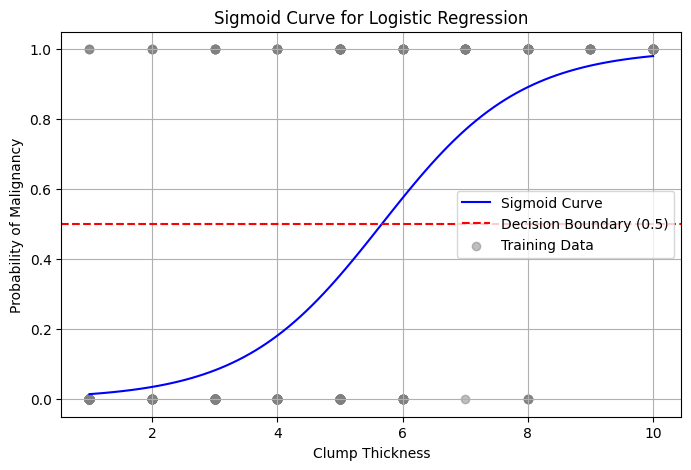

In [21]:
from scipy.special import expit

# Choose one feature
X_single = df[['Clump Thickness']].values
y = df['Class'].map({2: 0, 4: 1}).values

# Train logistic regression
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Generate sigmoid curve
x_values = np.linspace(X_single.min(), X_single.max(), 100).reshape(-1, 1)
y_probabilities = logistic.predict_proba(x_values)[:, 1]

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_probabilities, label="Sigmoid Curve", color='blue')
plt.axhline(0.5, color="red", linestyle="--", label="Decision Boundary (0.5)")
plt.scatter(X_train, y_train, color='gray', alpha=0.5, label="Training Data")
plt.xlabel("Clump Thickness")
plt.ylabel("Probability of Malignancy")
plt.title("Sigmoid Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()


Confusion matrix

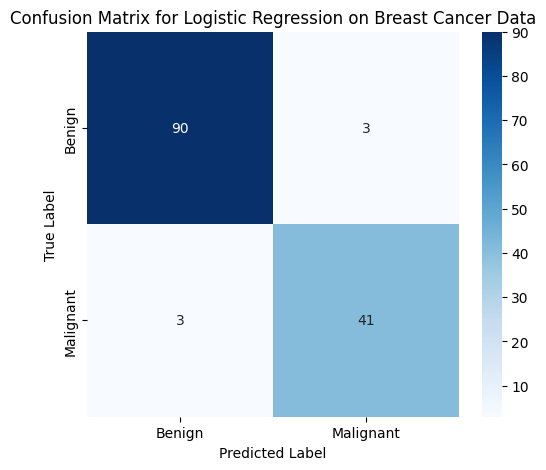

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set
predictions = logistic.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression on Breast Cancer Data")
plt.show()


Cost Funtion To determine Gradient Descent

In [15]:
import numpy as np

# Compute sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute cost function (Binary Cross-Entropy)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Add intercept term (bias)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a column of ones for bias term
theta = np.zeros(X_train_bias.shape[1])  # Initialize theta

# Compute initial cost
cost = compute_cost(X_train_bias, y_train, theta)
print(f"Initial Cost: {cost:.4f}")


Initial Cost: 0.6931


HeatMap

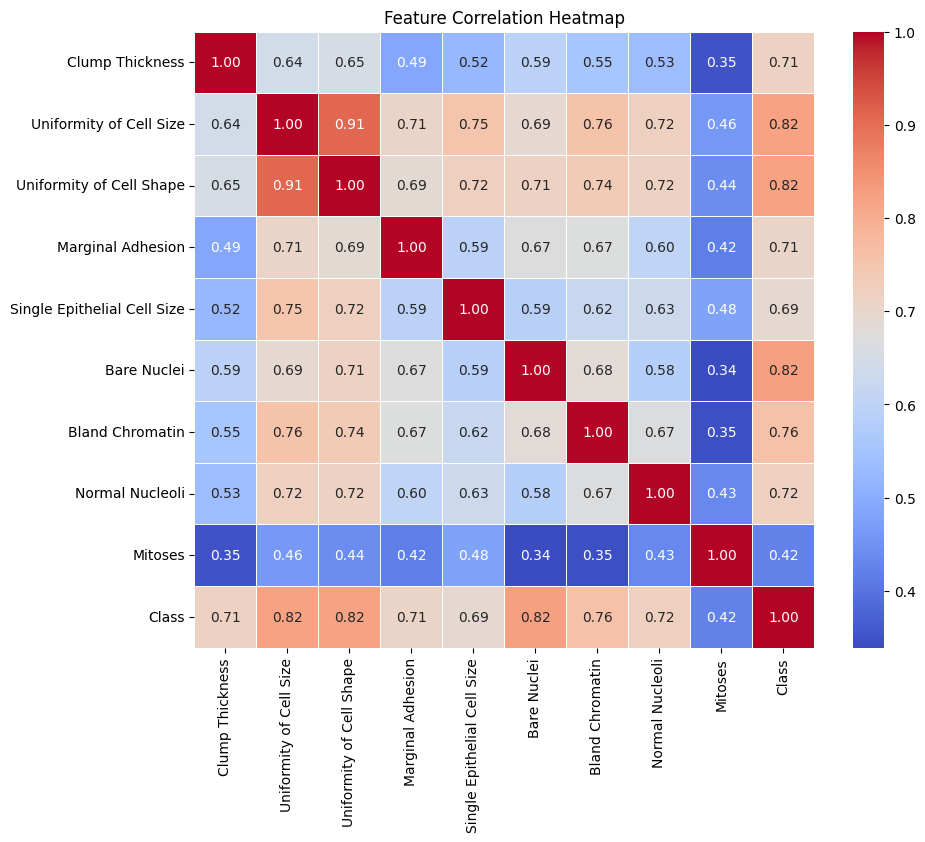

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/breast_cancer.csv')

# Convert 'Bare Nuclei' to numeric (if it's categorical)
if df['Bare Nuclei'].dtype == 'object':
    df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
    df.dropna(inplace=True)  # Drop any rows with NaN values

# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Heatmap title
plt.title("Feature Correlation Heatmap")
plt.show()
